# Import Library

In [1]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers,Sequential,losses,optimizers,datasets

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

def setup_seed(seed):
    random.seed(seed)  # 为python设置随机种子
    np.random.seed(seed)  # 为numpy设置随机种子
    tf.random.set_seed(seed)  # tf cpu fix seed
    os.environ['TF_DETERMINISTIC_OPS'] = '1'  # tf gpu fix seed, please `pip install tensorflow-determinism` first

setup_seed(2020)


seed = 2020
random.seed = 2020
np.random.seed = 2020
tf.seed = 2020
tf.random.set_seed(2020)

# Data processing

In [2]:
import scipy.io as scio
import pandas as pd

#input
feature1 = r'\MEANet-Mag dataset\Training dataset\caa_LVBO.mat'
data1 = scio.loadmat(feature1)
AA=data1['caa_LVBO']
A=AA[:,0:300]

feature2 = r'\MEANet-Mag dataset\Training dataset\cad_LVBO.mat'
data2 = scio.loadmat(feature2)
BB=data2['cad_LVBO']
B=BB[:,0:300]

feature3 = r'\MEANet-Mag dataset\Training dataset\cavv_LVBO.mat'
data3 = scio.loadmat(feature3)
CC=data3['cavv_LVBO']
C=CC[:,0:300]

feature4 = r'\MEANet-Mag dataset\Training dataset\CAV_LVBO.mat'
data4 = scio.loadmat(feature4)
DD=data4['CAV_LVBO']
D=DD[:,0:300]

feature5 = r'\MEANet-Mag dataset\Training dataset\DE_LVBO.mat'
data5 = scio.loadmat(feature5)
EE=data5['DE_LVBO']
E=EE[:,0:300]

feature6 = r'\MEANet-Mag dataset\Training dataset\IV2_LVBO.mat'
data6 = scio.loadmat(feature6)
FF=data6['IV2_LVBO']
F=FF[:,0:300]

feature7 = r'\MEANet-Mag dataset\Training dataset\PA_LVBO.mat'
data7 = scio.loadmat(feature7)
GG=data7['PA_LVBO']
G=GG[:,0:300]

feature8 = r'\MEANet-Mag dataset\Training dataset\PD_LVBO.mat'
data8 = scio.loadmat(feature8)
HH=data8['PD_LVBO']
H=HH[:,0:300]

feature9 = r'\MEANet-Mag dataset\Training dataset\PV_LVBO.mat'
data9 = scio.loadmat(feature9)
II=data9['PV_LVBO']
I=II[:,0:300]

feature10 = r'\MEANet-Mag dataset\Training dataset\ACC_LVBO.mat'
data10 = scio.loadmat(feature10)
JJ=data10['ACC_LVBO']
J=JJ[:,0:300]

feature11 = r'\MEANet-Mag dataset\Training dataset\VEL_LVBO.mat'
data11 = scio.loadmat(feature11)
KK=data11['VEL_LVBO']
K=KK[:,0:300]

feature12 = r'\MEANet-Mag dataset\Training dataset\DIS_LVBO.mat'
data12 = scio.loadmat(feature12)
LL=data12['DIS_LVBO']
L=LL[:,0:300]

feature13 = r'\MEANet-Mag dataset\Training dataset\tc_LVBO.mat'
data13 = scio.loadmat(feature13)
MM=data13['tc_LVBO']
M=MM[:,0:300]

feature14 = r'\MEANet-Mag dataset\Training dataset\TP_LVBO.mat'
data14 = scio.loadmat(feature14)
NN=data14['TP_LVBO']
N=NN[:,0:300]

feature15 = r'\MEANet-Mag dataset\Training dataset\Tva_LVBO.mat'
data15 = scio.loadmat(feature15)
OO=data15['Tva_LVBO']
O=OO[:,0:300]

feature16 = r'\MEANet-Mag dataset\Training dataset\OMG_ud.mat'
data16 = scio.loadmat(feature16)
PP=data16['OMG_ud']
P=PP[:,0:300]


label = pd.read_csv(open(r'\MEANet-Mag dataset\Training dataset\lable.csv',encoding='UTF-8'))


In [3]:
raw_data1=np.hstack((A,B))
raw_data2=np.hstack((raw_data1,C))
raw_data3=np.hstack((raw_data2,D))
raw_data4=np.hstack((raw_data3,E))
raw_data5=np.hstack((raw_data4,F))
raw_data6=np.hstack((raw_data5,G))
raw_data7=np.hstack((raw_data6,H))
raw_data8=np.hstack((raw_data7,I))
raw_data9=np.hstack((raw_data8,J))
raw_data10=np.hstack((raw_data9,K))
raw_data11=np.hstack((raw_data10,L))
raw_data12=np.hstack((raw_data11,M))
raw_data13=np.hstack((raw_data12,N))
raw_data14=np.hstack((raw_data13,O))
train_xx=np.hstack((raw_data14,P))


#print(train_xx.shape)


y_data=label.iloc[:,[1,3]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
#print(y_data[0])
#print(y_data.shape)

In [4]:
train_y=y_data[:,[1]] #y_train_lable
dis_train=y_data[:,[0]] #train_site_distance


#print(train_y.shape)
#print(dis_train.shape)



In [5]:
train_x=[]
for i in range(len(train_xx)):
    train_x.append(np.array(train_xx[i].reshape(16,1,300)).T)

In [6]:
train_dis=[]
for i in range(len(dis_train)):
    train_dis.append(np.array(dis_train[i].reshape(1,1,1)).T)

In [7]:
train_x=np.array(train_x)
train_dis=np.array(train_dis)
#test_x=np.array(test_x)

In [8]:
#3#  ##Reshaping
train_x = np.reshape(train_x, (train_x.shape[0], 300, 16))
train_dis = np.reshape(train_dis, (train_dis.shape[0], 1, 1))
#test_x = np.reshape(test_x, (test_x.shape[0], 300, 9))
#print("0",train_x.shape[0])
#print("1",train_x.shape[1])
#print(train_x.shape)
#print(train_x)

# MEANet-Mag architecture, training and testing

In [9]:
from keras import backend as K
from keras.engine.topology import Layer
class Self_Attention(Layer):
 
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(Self_Attention, self).__init__(**kwargs)
 
    def build(self, input_shape):
        # 为该层创建一个可训练的权重
        #inputs.shape = (batch_size, time_steps, seq_len)
        self.kernel = self.add_weight(name='kernel',
                                      shape=(3,input_shape[2], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
 
        super(Self_Attention, self).build(input_shape)  # 一定要在最后调用它
 
    def call(self, x):
        WQ = K.dot(x, self.kernel[0])
        WK = K.dot(x, self.kernel[1])
        WV = K.dot(x, self.kernel[2])
 
        print("WQ.shape",WQ.shape)
 
        print("K.permute_dimensions(WK, [0, 2, 1]).shape",K.permute_dimensions(WK, [0, 2, 1]).shape)
 
 
        QK = K.batch_dot(WQ,K.permute_dimensions(WK, [0, 2, 1]))
 
        QK = QK / (64**0.5)
 
        QK = K.softmax(QK)
 
        print("QK.shape",QK.shape)
 
        V = K.batch_dot(QK,WV)
 
        return V
 
    def compute_output_shape(self, input_shape):
 
        return (input_shape[0],input_shape[1],self.output_dim)

    def get_config(self):  #在有自定义网络层时，需要保存模型时，重写get_config函数
        config = {"output_dim": self.output_dim}
        base_config = super(Self_Attention, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [10]:
def LocalEncoder(x):


    e = tf.keras.layers.Conv1D(25,kernel_size=4,strides=2,    #  2第一个卷积层, 124个 4x4 卷积核  2020   10 0.251 
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  input_shape = (300,16),padding="same")(x) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU 
    e = tf.keras.layers.BatchNormalization()(e) 
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2
    e = layers.Dropout(rate=0.2)(e) #0.458


    e = tf.keras.layers.Conv1D(50,kernel_size=4,strides=2,   # 第二个卷积层, 32 个 4x4 卷积核     50 0.329
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  padding="same")(e) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU 
    e = tf.keras.layers.BatchNormalization()(e) 
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层 
    e = layers.Dropout(rate=0.2)(e) #0.458
    

         
    e = tf.keras.layers.Bidirectional(GRU(units = 50, return_sequences=True, dropout=0.0, recurrent_dropout=0.0))(e) 

    
    e = tf.keras.layers.Bidirectional(GRU(units = 25,return_sequences=True, dropout=0.0, recurrent_dropout=0.0))(e)


    e = Self_Attention(50)(e)    
    
    
    
    return e
    
    

In [11]:
seed=50
#50 17.20 1.32
drop_rate = 0.2
def get_model():

    inp1 = Input(shape=(300, 16), name='input_layer') 

    x1 = LocalEncoder(inp1)


    x1 = tf.keras.layers.Flatten()(x1) # 打平层，方便全连接层处理 

    inp2 = tf.keras.layers.Input(shape=(1,1))   #加入场地放大系数和震中距
    x2 = tf.keras.layers.Flatten()(inp2) # 打平层，方便全连接层处理   
    
    e = tf.keras.layers.Concatenate()([x1,x2])    
    
    
    
    #e = layers.Dropout(rate=0.2)(e) #0.458
    e = tf.keras.layers.Dense(512,activation='relu')(e) # 全连接层，14节点  0.340 
    e = tf.keras.layers.Dense(256,activation='relu')(e) # 全连接层，14节点  0.340 
    e = tf.keras.layers.Dense(128,activation='relu')(e) # 全连接层，14节点  0.340 
    e = tf.keras.layers.Dense(64,activation='relu')(e) # 全连接层，14节点  0.340 
    e = tf.keras.layers.Dense(32,activation='relu')(e) # 全连接层，14节点  0.340 
    o = tf.keras.layers.Dense(1)(e) # 全连接层，10 个节点 
    
    

    rms = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model = Model([inp1,inp2], o)
    model.compile(optimizer = rms, loss = 'mean_squared_error')

    return model

In [12]:
model = get_model()
model.summary() 

WQ.shape (None, 19, 50)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 50, 19)
QK.shape (None, 19, 19)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 300, 16)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 150, 25)      1625        input_layer[0][0]                
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 150, 25)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 150, 25)      100         re_lu[0][0]     

In [13]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor="val_loss",
                               factor=0.1,
                                cooldown= 0,
                                patience= 5,
                                min_lr=0.5e-6)
early_stopping_monitor = EarlyStopping(monitor= 'val_loss', patience = 10) #10  17.20 1.32
callbacks = [lr_reducer, early_stopping_monitor]




model = get_model()
model.fit([train_x,train_dis], train_y, epochs=300, batch_size=256,  
            validation_split=0.1, callbacks=callbacks)  #256 ,train_physics  ,test_physics ,train_physics

pred_train_all = model.predict([train_x,train_dis]).ravel()
#pred_test_all = model.predict(test_x).ravel()  ##ravel() 转换成1列


#pred_valid_all = scaler_seq.inverse_transform(pred_valid_all)
#reverse_valid = scaler_seq.inverse_transform(y_valid)
#pred_test_all = scaler_seq.inverse_transform(pred_test_all)
#reverse_test = scaler_seq.inverse_transform(y_test)

WQ.shape (None, 19, 50)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 50, 19)
QK.shape (None, 19, 19)
Epoch 1/300
WQ.shape (None, 19, 50)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 50, 19)
QK.shape (None, 19, 19)
WQ.shape (None, 19, 50)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 50, 19)
QK.shape (None, 19, 19)
162/162 [==============================] - ETA: 0s - loss: 1.0114WQ.shape (None, 19, 50)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 50, 19)
QK.shape (None, 19, 19)
162/162 [==============================] - 9s 54ms/step - loss: 1.0114 - val_loss: 1.6273
Epoch 2/300
162/162 [==============================] - 7s 45ms/step - loss: 0.2036 - val_loss: 0.6585
Epoch 3/300
162/162 [==============================] - 7s 44ms/step - loss: 0.1844 - val_loss: 0.3847
Epoch 4/300
162/162 [==============================] - 7s 45ms/step - loss: 0.1690 - val_loss: 0.2217
Epoch 5/300
162/162 [==============================] - 8s 48ms/step - loss: 0.1627 - val_loss: 0.2749
Epoch

In [14]:
# 保存权重（推荐方式）
model.save_weights("MEANet_Mag_weights.h5")  # HDF5格式

In [15]:
def get_model_size_mb(model):
    params = model.count_params()
    # 假设所有参数为float32（4字节）
    size_mb = params * 4 / 1024**2
    return size_mb
 
print("Model size (MB):", get_model_size_mb(model))

Model size (MB): 2.7700119018554688


训练标准差STD= 0.31908680269533424
训练误差均值MEAN= -0.06516873192514618
训练平均绝对误差MAE= 0.24314517952530165
训练RMSE= 0.32567368833705734
训练MAPE= 5.537128270604195
训练r2 score: 0.8965049864434028


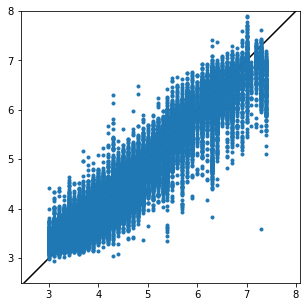

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("训练标准差STD=",np.std(pred_train_all-train_y.ravel()))
print("训练误差均值MEAN=",np.mean(pred_train_all-train_y.ravel()))
print("训练平均绝对误差MAE=",metrics.mean_absolute_error(pred_train_all, train_y.ravel()))
print("训练RMSE=",metrics.mean_squared_error(pred_train_all, train_y.ravel())**0.5)
print("训练MAPE=",np.mean(np.abs((train_y.ravel() - pred_train_all) / train_y.ravel())) * 100)
print("训练r2 score:", r2_score(train_y.ravel(), pred_train_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(train_y.ravel(),pred_train_all,'.')
plt.xlim(2.5, 8)
plt.ylim(2.5, 8)
plt.show()

In [17]:
#########################保存训练结果####################################
pred_train_all=pred_train_all.reshape(pred_train_all.shape[0],1)

#y_score_tr=y_score_tr.reshape(y_score_tr.shape[0],1)
#print(pred_train_all.shape)
#print(train_y.shape)

tr_result=np.concatenate((train_y,pred_train_all),axis=1)

#print(tr_result.shape)

data_tr = pd.DataFrame(tr_result) #将数组转换为dataframe结构
data_tr.columns=['True M','Pred M']
writer_tr = pd.ExcelWriter(r'\MEANet-Mag\magtrain.xls')   # 写入Excel文件

data_tr.to_excel(writer_tr,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tr.save()
writer_tr.close()
#########################保存训练结果####################################

In [19]:
#震例
import scipy.io as scio
import pandas as pd

#input
feature1z = r'\MEANet-Mag dataset\Test dataset\caa_LVBO.mat'
data1z = scio.loadmat(feature1z)
AAz=data1z['caa_LVBO']
Az=AAz[:,0:300]

feature2z = r'\MEANet-Mag dataset\Test dataset\cad_LVBO.mat'
data2z = scio.loadmat(feature2z)
BBz=data2z['cad_LVBO']
Bz=BBz[:,0:300]

feature3z = r'\MEANet-Mag dataset\Test dataset\cavv_LVBO.mat'
data3z = scio.loadmat(feature3z)
CCz=data3z['cavv_LVBO']
Cz=CCz[:,0:300]

feature4z = r'\MEANet-Mag dataset\Test dataset\CAV_LVBO.mat'
data4z = scio.loadmat(feature4z)
DDz=data4z['CAV_LVBO']
Dz=DDz[:,0:300]

feature5z = r'\MEANet-Mag dataset\Test dataset\DE_LVBO.mat'
data5z = scio.loadmat(feature5z)
EEz=data5z['DE_LVBO']
Ez=EEz[:,0:300]

feature6z = r'\MEANet-Mag dataset\Test dataset\IV2_LVBO.mat'
data6z = scio.loadmat(feature6z)
FFz=data6z['IV2_LVBO']
Fz=FFz[:,0:300]

feature7z = r'\MEANet-Mag dataset\Test dataset\PA_LVBO.mat'
data7z = scio.loadmat(feature7z)
GGz=data7z['PA_LVBO']
Gz=GGz[:,0:300]

feature8z = r'\MEANet-Mag dataset\Test dataset\PD_LVBO.mat'
data8z = scio.loadmat(feature8z)
HHz=data8z['PD_LVBO']
Hz=HHz[:,0:300]

feature9z = r'\MEANet-Mag dataset\Test dataset\PV_LVBO.mat'
data9z = scio.loadmat(feature9z)
IIz=data9z['PV_LVBO']
Iz=IIz[:,0:300]

feature10z = r'\MEANet-Mag dataset\Test dataset\ACC_LVBO.mat'
data10z = scio.loadmat(feature10z)
JJz=data10z['ACC_LVBO']
Jz=JJz[:,0:300]

feature11z = r'\MEANet-Mag dataset\Test dataset\VEL_LVBO.mat'
data11z = scio.loadmat(feature11z)
KKz=data11z['VEL_LVBO']
Kz=KKz[:,0:300]

feature12z = r'\MEANet-Mag dataset\Test dataset\DIS_LVBO.mat'
data12z = scio.loadmat(feature12z)
LLz=data12z['DIS_LVBO']
Lz=LLz[:,0:300]

feature13z = r'\MEANet-Mag dataset\Test dataset\tc_LVBO.mat'
data13z = scio.loadmat(feature13z)
MMz=data13z['tc_LVBO']
Mz=MMz[:,0:300]

feature14z = r'\MEANet-Mag dataset\Test dataset\TP_LVBO.mat'
data14z = scio.loadmat(feature14z)
NNz=data14z['TP_LVBO']
Nz=NNz[:,0:300]

feature15z = r'\MEANet-Mag dataset\Test dataset\Tva_LVBO.mat'
data15z = scio.loadmat(feature15z)
OOz=data15z['Tva_LVBO']
Oz=OOz[:,0:300]

feature16z = r'\MEANet-Mag dataset\Test dataset\OMG_ud.mat'
data16z = scio.loadmat(feature16z)
PPz=data16z['OMG_ud']
Pz=PPz[:,0:300]



labelz = pd.read_csv(open(r'\MEANet-Mag dataset\Test dataset\lable.csv',encoding='UTF-8'))


In [20]:
raw_data1z=np.hstack((Az,Bz))
raw_data2z=np.hstack((raw_data1z,Cz))
raw_data3z=np.hstack((raw_data2z,Dz))
raw_data4z=np.hstack((raw_data3z,Ez))
raw_data5z=np.hstack((raw_data4z,Fz))
raw_data6z=np.hstack((raw_data5z,Gz))
raw_data7z=np.hstack((raw_data6z,Hz))
raw_data8z=np.hstack((raw_data7z,Iz))
raw_data9z=np.hstack((raw_data8z,Jz))
raw_data10z=np.hstack((raw_data9z,Kz))
raw_data11z=np.hstack((raw_data10z,Lz))
raw_data12z=np.hstack((raw_data11z,Mz))
raw_data13z=np.hstack((raw_data12z,Nz))
raw_data14z=np.hstack((raw_data13z,Oz))
x_dataz=np.hstack((raw_data14z,Pz))

#x_dataz=np.hstack((raw_data7z,Iz))

y_dataz=labelz.iloc[:,[2,3]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
#print(y_dataz[0])
#print(y_dataz.shape)

In [21]:
zhenli_y=y_dataz[:,[1]] #y_train_lable
dis_zhenli=y_dataz[:,[0]] #train_site_distance



In [22]:
zhenli_x=[]
for i in range(len(x_dataz)):
    zhenli_x.append(np.array(x_dataz[i].reshape(16,1,300)).T)

In [23]:
zhenli_dis=[]
for i in range(len(dis_zhenli)):
    zhenli_dis.append(np.array(dis_zhenli[i].reshape(1,1,1)).T)



In [24]:
zhenli_x=np.array(zhenli_x)
zhenli_dis=np.array(zhenli_dis)

In [25]:
zhenli_x = np.reshape(zhenli_x, (zhenli_x.shape[0], 300, 16))
zhenli_dis = np.reshape(zhenli_dis, (zhenli_dis.shape[0], 1, 1))

In [23]:
zhenli_x1=zhenli_x[0]
zhenli_x1=zhenli_x1.reshape(1, 300, 16)

zhenli_dis1=zhenli_dis[0]
zhenli_dis1=zhenli_dis1.reshape(1,1)
print(zhenli_x1.shape)
print(zhenli_dis1.shape)

(1, 300, 16)
(1, 1)


In [29]:

import time
start_time = time.perf_counter()  # 记录开始时间
pred_zhenli_all = model.predict([zhenli_x1,zhenli_dis1]).ravel()  ##ravel() 转换成1列
end_time = time.perf_counter()  # 记录结束时间
elapsed_time_ms = (end_time - start_time) * 1000  # 转换为毫秒
print(f"Elapsed time: {elapsed_time_ms:.2f} ms")


Elapsed time: 45.90 ms


震例标准差STD= 0.3847302438860271
震例误差均值MEAN= -0.12254525045206799
震例平均绝对误差MAE= 0.2986048284099265
震例RMSE= 0.4037755551899619
震例MAPE= 6.79711768218767
震例r2 score: 0.8305195001636287


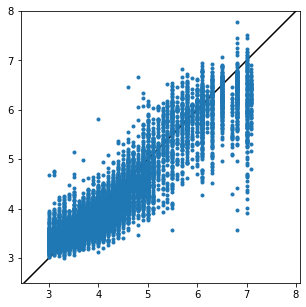

In [26]:
pred_zhenli_all = model.predict([zhenli_x,zhenli_dis]).ravel()  ##ravel() 转换成1列
print("震例标准差STD=",np.std(pred_zhenli_all-zhenli_y.ravel()))
print("震例误差均值MEAN=",np.mean(pred_zhenli_all-zhenli_y.ravel()))
print("震例平均绝对误差MAE=",metrics.mean_absolute_error(pred_zhenli_all, zhenli_y.ravel()))
print("震例RMSE=",metrics.mean_squared_error(pred_zhenli_all, zhenli_y.ravel())**0.5)
print("震例MAPE=",np.mean(np.abs((zhenli_y.ravel() - pred_zhenli_all) / zhenli_y.ravel())) * 100)
print("震例r2 score:", r2_score(zhenli_y.ravel(), pred_zhenli_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(zhenli_y.ravel(),pred_zhenli_all,'.')
plt.xlim(2.5, 8)
plt.ylim(2.5, 8)
plt.show()  

In [27]:
#########################保存震例结果####################################
pred_zhenli_all=pred_zhenli_all.reshape(pred_zhenli_all.shape[0],1)

#print(pred_zhenli_all.shape)
#print(zhenli_y.shape)

tz_result=np.concatenate((zhenli_y,pred_zhenli_all),axis=1)

#print(tz_result.shape)

data_tz = pd.DataFrame(tz_result) #将数组转换为dataframe结构
data_tz.columns=['True M','Pred M']
writer_tz = pd.ExcelWriter(r'\MEANet-Mag\magtest.xls')   # 写入Excel文件

data_tz.to_excel(writer_tz,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tz.save()
writer_tz.close()
#########################保存震例结果####################################

# Test on the Chinese strong-ground motion data

In [28]:
#在中国地区的测试
import scipy.io as scio
import pandas as pd

#input
feature1z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\caa_LVBO.mat'
data1z_CH = scio.loadmat(feature1z_CH)
AAz_CH=data1z_CH['caa_LVBO']
Az_CH=AAz_CH[:,0:300]

feature2z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\cad_LVBO.mat'
data2z_CH = scio.loadmat(feature2z_CH)
BBz_CH=data2z_CH['cad_LVBO']
Bz_CH=BBz_CH[:,0:300]

feature3z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\cavv_LVBO.mat'
data3z_CH = scio.loadmat(feature3z_CH)
CCz_CH=data3z_CH['cavv_LVBO']
Cz_CH=CCz_CH[:,0:300]

feature4z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\CAV_LVBO.mat'
data4z_CH = scio.loadmat(feature4z_CH)
DDz_CH=data4z_CH['CAV_LVBO']
Dz_CH=DDz_CH[:,0:300]

feature5z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\DE_LVBO.mat'
data5z_CH = scio.loadmat(feature5z_CH)
EEz_CH=data5z_CH['DE_LVBO']
Ez_CH=EEz_CH[:,0:300]

feature6z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\IV2_LVBO.mat'
data6z_CH = scio.loadmat(feature6z_CH)
FFz_CH=data6z_CH['IV2_LVBO']
Fz_CH=FFz_CH[:,0:300]

feature7z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\PA_LVBO.mat'
data7z_CH = scio.loadmat(feature7z_CH)
GGz_CH=data7z_CH['PA_LVBO']
Gz_CH=GGz_CH[:,0:300]

feature8z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\PD_LVBO.mat'
data8z_CH = scio.loadmat(feature8z_CH)
HHz_CH=data8z_CH['PD_LVBO']
Hz_CH=HHz_CH[:,0:300]

feature9z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\PV_LVBO.mat'
data9z_CH = scio.loadmat(feature9z_CH)
IIz_CH=data9z_CH['PV_LVBO']
Iz_CH=IIz_CH[:,0:300]

feature10z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\ACC_LVBO.mat'
data10z_CH = scio.loadmat(feature10z_CH)
JJz_CH=data10z_CH['ACC_LVBO']
Jz_CH=JJz_CH[:,0:300]

feature11z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\VEL_LVBO.mat'
data11z_CH = scio.loadmat(feature11z_CH)
KKz_CH=data11z_CH['VEL_LVBO']
Kz_CH=KKz_CH[:,0:300]

feature12z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\DIS_LVBO.mat'
data12z_CH = scio.loadmat(feature12z_CH)
LLz_CH=data12z_CH['DIS_LVBO']
Lz_CH=LLz_CH[:,0:300]

feature13z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\tc_LVBO.mat'
data13z_CH = scio.loadmat(feature13z_CH)
MMz_CH=data13z_CH['tc_LVBO']
Mz_CH=MMz_CH[:,0:300]

feature14z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\TP_LVBO.mat'
data14z_CH = scio.loadmat(feature14z_CH)
NNz_CH=data14z_CH['TP_LVBO']
Nz_CH=NNz_CH[:,0:300]

feature15z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\Tva_LVBO.mat'
data15z_CH = scio.loadmat(feature15z_CH)
OOz_CH=data15z_CH['Tva_LVBO']
Oz_CH=OOz_CH[:,0:300]

feature16z_CH = r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\OMG_ud.mat'
data16z_CH = scio.loadmat(feature16z_CH)
PPz_CH=data16z_CH['OMG_ud']
Pz_CH=PPz_CH[:,0:300]



labelz_CH = pd.read_csv(open(r'\MEANet-Mag dataset\Chinese strong-ground motion test dataset\lable.csv',encoding='UTF-8'))


In [29]:
raw_data1z_CH=np.hstack((Az_CH,Bz_CH))
raw_data2z_CH=np.hstack((raw_data1z_CH,Cz_CH))
raw_data3z_CH=np.hstack((raw_data2z_CH,Dz_CH))
raw_data4z_CH=np.hstack((raw_data3z_CH,Ez_CH))
raw_data5z_CH=np.hstack((raw_data4z_CH,Fz_CH))
raw_data6z_CH=np.hstack((raw_data5z_CH,Gz_CH))
raw_data7z_CH=np.hstack((raw_data6z_CH,Hz_CH))
raw_data8z_CH=np.hstack((raw_data7z_CH,Iz_CH))
raw_data9z_CH=np.hstack((raw_data8z_CH,Jz_CH))
raw_data10z_CH=np.hstack((raw_data9z_CH,Kz_CH))
raw_data11z_CH=np.hstack((raw_data10z_CH,Lz_CH))
raw_data12z_CH=np.hstack((raw_data11z_CH,Mz_CH))
raw_data13z_CH=np.hstack((raw_data12z_CH,Nz_CH))
raw_data14z_CH=np.hstack((raw_data13z_CH,Oz_CH))
x_dataz_CH=np.hstack((raw_data14z_CH,Pz_CH))

#x_dataz=np.hstack((raw_data7z,Iz))

y_dataz_CH=labelz_CH.iloc[:,[2,3]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
#print(y_dataz[0])
#print(y_dataz.shape)

In [30]:
zhenli_y_CH=y_dataz_CH[:,[1]] #y_train_lable
dis_zhenli_CH=y_dataz_CH[:,[0]] #train_site_distance



In [31]:
zhenli_x_CH=[]
for i in range(len(x_dataz_CH)):
    zhenli_x_CH.append(np.array(x_dataz_CH[i].reshape(16,1,300)).T)

In [32]:
zhenli_dis_CH=[]
for i in range(len(dis_zhenli_CH)):
    zhenli_dis_CH.append(np.array(dis_zhenli_CH[i].reshape(1,1,1)).T)



In [33]:
zhenli_x_CH=np.array(zhenli_x_CH)
zhenli_dis_CH=np.array(zhenli_dis_CH)

In [34]:
zhenli_x_CH = np.reshape(zhenli_x_CH, (zhenli_x_CH.shape[0], 300, 16))
zhenli_dis_CH = np.reshape(zhenli_dis_CH, (zhenli_dis_CH.shape[0], 1, 1))

震例标准差STD= 0.5227215908955474
震例误差均值MEAN= -0.033424282883756845
震例平均绝对误差MAE= 0.41728864466731336
震例RMSE= 0.5237891219514448
震例MAPE= 9.172612852008179
震例r2 score: 0.5715459839882724


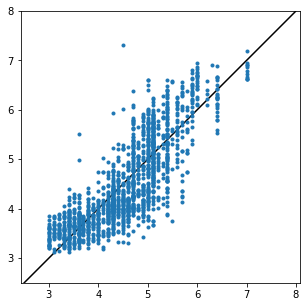

In [35]:
pred_zhenli_all_CH = model.predict([zhenli_x_CH,zhenli_dis_CH]).ravel()  ##ravel() 转换成1列
print("震例标准差STD=",np.std(pred_zhenli_all_CH-zhenli_y_CH.ravel()))
print("震例误差均值MEAN=",np.mean(pred_zhenli_all_CH-zhenli_y_CH.ravel()))
print("震例平均绝对误差MAE=",metrics.mean_absolute_error(pred_zhenli_all_CH, zhenli_y_CH.ravel()))
print("震例RMSE=",metrics.mean_squared_error(pred_zhenli_all_CH, zhenli_y_CH.ravel())**0.5)
print("震例MAPE=",np.mean(np.abs((zhenli_y_CH.ravel() - pred_zhenli_all_CH) / zhenli_y_CH.ravel())) * 100)
print("震例r2 score:", r2_score(zhenli_y_CH.ravel(), pred_zhenli_all_CH))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(zhenli_y_CH.ravel(),pred_zhenli_all_CH,'.')
plt.xlim(2.5, 8)
plt.ylim(2.5, 8)
plt.show()  